In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sb
from matplotlib import style
%matplotlib inline 

In [2]:
#Lagos_RE = pd.read_csv("Property_Value01.csv") initial dataframe before being reduced
Lagos_RE = pd.read_csv('cleaned_data.csv') #new dataframe after some data cleaning
Lagos_RE.to_csv('cleaned_data.csv', index=False)


Lagos_RE.head()

,LOCATION,PRICE,BEDROOMS,BATHROOMS,TOILETS,HOUSE_TYPE,Year,inflation_rate,price_range
0,Ikoyi,15000000.0,3,3,4,HOUSE,2022,17.0,10M-100M
1,Ikoyi,13000000.0,4,4,5,HOUSE,2022,17.0,10M-100M
2,Ikoyi,16000000.0,4,3,4,HOUSE,2022,17.0,10M-100M
3,Ikoyi,18000000.0,4,4,5,HOUSE,2022,17.0,10M-100M
4,Ikoyi,15000000.0,3,3,4,HOUSE,2022,17.0,10M-100M


In [3]:
Lagos_RE.shape

(55793, 9)

In [4]:
Lagos_RE['LOCATION'].unique()

array(['Ikoyi', 'Yaba', 'Lekki', 'Ajah', 'Victoria Island', 'Ikeja',
       'Ilupeju', 'Isolo', 'Shomolu', 'Ketu', 'Surulere', 'Amuwo Odofin',
       'Abule Egba', 'Oshodi', 'Apapa', 'Ikorodu', 'Ojodu', 'Ipaja',
       'Egbeda', 'Idimu', 'Ogba', 'Akowonjo', 'other', 'Ago Palace-Okota',
       'Gbagada', 'Maryland', 'Ikotun-Igando', 'Ojo', 'Ayobo', 'Agege',
       'Lagos Island', 'Magodo', 'Ojota', 'Ogudu', 'Alimosho', 'Ejigbo',
       'Sangotedo', 'Badagry', 'Isheri North'], dtype=object)

In [5]:
Lagos_RE.groupby('HOUSE_TYPE')['HOUSE_TYPE'].agg('count').sort_values(ascending=False)

HOUSE_TYPE
HOUSE                     28418
apartment                  7911
DETACHED DUPLEX            5974
TERRACED DUPLEX            4020
APARTMENT                  3694
terraced duplex            2413
semi-detached duplex       1385
detached duplex             714
DETACHED BUNGALOW           654
MASSIONETTE                 222
terraced bungalow           125
TERRACED BUNGALOW            86
detached bungalow            79
semi-detached bungalow       66
BUNGALOW                     32
Name: HOUSE_TYPE, dtype: int64

In [6]:
#Checking amount of void rows in each column
Lagos_RE.isnull().sum()

LOCATION          0
PRICE             0
BEDROOMS          0
BATHROOMS         0
TOILETS           0
HOUSE_TYPE        0
Year              0
inflation_rate    0
price_range       0
dtype: int64

In [7]:
len(Lagos_RE.LOCATION.unique())

39

In [8]:
#Grouping values of a variable in descending order
Location_Stats = Lagos_RE.groupby('LOCATION')['LOCATION'].agg('count').sort_values(ascending=False)

Location_Stats.head(20)

LOCATION
Lekki              24516
Ajah                5749
Ikoyi               5282
Ikeja               3278
Ojodu               3142
Victoria Island     2610
Gbagada             1303
Surulere            1282
Magodo              1119
Yaba                 880
Ipaja                748
Isolo                666
Ogba                 558
Ketu                 506
Ogudu                501
Maryland             449
Amuwo Odofin         443
Ikorodu              420
Shomolu              258
Egbeda               230
Name: LOCATION, dtype: int64

In [9]:
low_location = (Location_Stats[Location_Stats<=10])

(low_location)

Series([], Name: LOCATION, dtype: int64)

In [10]:
#Grouping the locations with less than 1 as others
Lagos_RE.LOCATION = Lagos_RE.LOCATION.apply(lambda x: 'other' if x in low_location else x)

len(Lagos_RE.LOCATION.unique())

39

In [11]:
print(Lagos_RE['PRICE'].describe().apply(lambda x: '{:.2f}'.format(x) if isinstance(x, float) else x))


count       55793.00
mean      4302115.56
std       3822571.69
min        250000.00
25%       1700000.00
50%       3500000.00
75%       5000000.00
max      20000000.00
Name: PRICE, dtype: object


In [12]:
Lagos_RE.HOUSE_TYPE.unique()

array(['HOUSE', 'TERRACED DUPLEX', 'MASSIONETTE', 'DETACHED DUPLEX',
       'APARTMENT', 'DETACHED BUNGALOW', 'TERRACED BUNGALOW', 'BUNGALOW',
       'apartment', 'terraced duplex', 'detached duplex',
       'terraced bungalow', 'semi-detached duplex', 'detached bungalow',
       'semi-detached bungalow'], dtype=object)

In [13]:
Lagos_RE[Lagos_RE['HOUSE_TYPE'] == 'apartment'].head(20)

,LOCATION,PRICE,BEDROOMS,BATHROOMS,TOILETS,HOUSE_TYPE,Year,inflation_rate,price_range
21266,Lekki,2500000.0,2,2,3,apartment,2020,15.0,1M-10M
21267,Lekki,3300000.0,2,2,3,apartment,2020,15.0,1M-10M
21268,Lekki,4000000.0,3,3,4,apartment,2020,15.0,1M-10M
21272,Ajah,1600000.0,3,3,3,apartment,2020,15.0,1M-10M
21275,Lekki,4000000.0,3,3,4,apartment,2020,15.0,1M-10M
21277,Lekki,2500000.0,2,2,3,apartment,2020,15.0,1M-10M
21278,Lekki,3300000.0,2,2,3,apartment,2020,15.0,1M-10M
21279,Lekki,4000000.0,3,3,4,apartment,2020,15.0,1M-10M
21283,Ajah,1600000.0,3,3,3,apartment,2020,15.0,1M-10M
21286,Lekki,4000000.0,3,3,4,apartment,2020,15.0,1M-10M


In [14]:
# Adding inflation rates to the dataframe through mapping it to the year columns
inflation_rate = {
    2012: 12.0, 2013: 11.2, 2014: 10.8, 2015: 11.6, 2016: 12.5,
    2017: 13.2, 2018: 13.8, 2019: 14.3, 2020: 15.0, 2021: 16.1, 2022: 17.0
}

Lagos_RE['inflation_rate'] = Lagos_RE['Year'].map(inflation_rate)

Lagos_RE.to_csv('Cleaned_data.csv', index=False)

pd.read_csv('Cleaned_data.csv').head()


,LOCATION,PRICE,BEDROOMS,BATHROOMS,TOILETS,HOUSE_TYPE,Year,inflation_rate,price_range
0,Ikoyi,15000000.0,3,3,4,HOUSE,2022,17.0,10M-100M
1,Ikoyi,13000000.0,4,4,5,HOUSE,2022,17.0,10M-100M
2,Ikoyi,16000000.0,4,3,4,HOUSE,2022,17.0,10M-100M
3,Ikoyi,18000000.0,4,4,5,HOUSE,2022,17.0,10M-100M
4,Ikoyi,15000000.0,3,3,4,HOUSE,2022,17.0,10M-100M


In [15]:
print(Lagos_RE['PRICE'].describe().apply(lambda x: '{:.2f}'.format(x) if isinstance(x, float) else x))


count       55793.00
mean      4302115.56
std       3822571.69
min        250000.00
25%       1700000.00
50%       3500000.00
75%       5000000.00
max      20000000.00
Name: PRICE, dtype: object


Frequency Table for Price Ranges:
price_range
<1M         7558
1M-10M     43754
10M-20M     4481
Name: count, dtype: int64


C:\Users\PASTOR OMOWAYE\AppData\Local\Temp\ipykernel_12708\609083378.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Lagos_RE, x='price_range', palette='viridis', order=labels)


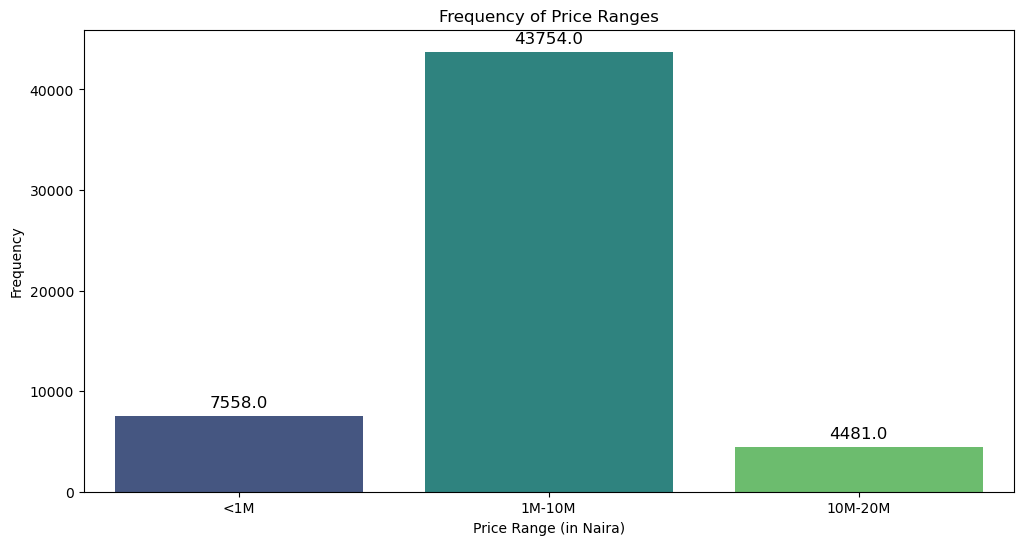

In [16]:
# Plotting Price ranges vs their Frequency

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Step 1: Define the bins for price (in Naira)
bins = [0, 1000000, 10000000, 100000000]
labels = ['<1M', '1M-10M', '10M-20M']

# Step 2: Create a new column for the price range classification
Lagos_RE['price_range'] = pd.cut(Lagos_RE['PRICE'], bins=bins, labels=labels)

# Step 3: Frequency table for the price ranges
frequency_table_price = Lagos_RE['price_range'].value_counts().sort_index()
print("Frequency Table for Price Ranges:")
print(frequency_table_price)

# Step 4: Visualize the frequency of price ranges with spacing between bars
plt.figure(figsize=(12, 6))
sns.countplot(data=Lagos_RE, x='price_range', palette='viridis', order=labels)

# Adjust the spacing between the bars by adjusting the width of the bars
plt.title('Frequency of Price Ranges')
plt.xlabel('Price Range (in Naira)')
plt.ylabel('Frequency')

# Add labels for each bar to show the counts on top
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       fontsize=12, color='black', 
                       xytext=(0, 9), textcoords='offset points')

plt.show()



C:\Users\PASTOR OMOWAYE\AppData\Local\Temp\ipykernel_12708\821954387.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Lagos_RE, x='price_range', y='BEDROOMS', palette='viridis')


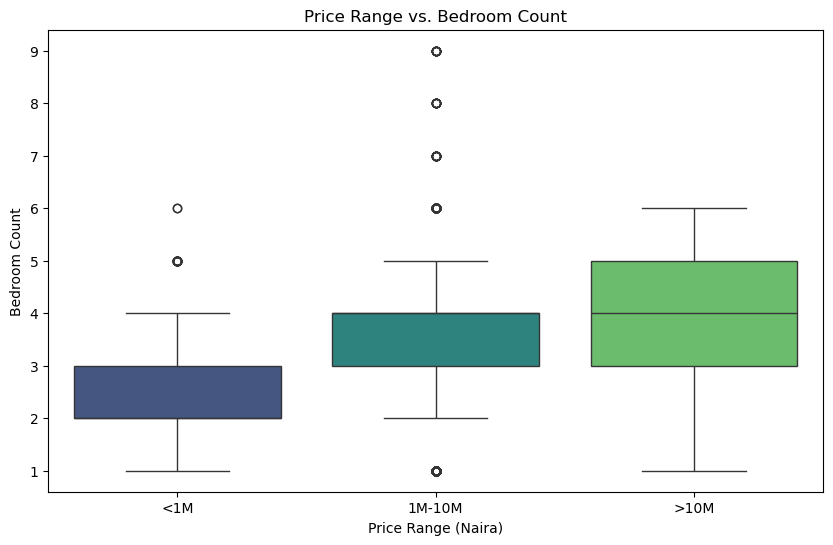

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Lagos_RE is already filtered to your specified price range
# Define bins and labels for the price categories
price_bins = [0, 1000000, 10000000, 20000000]
price_labels = ['<1M', '1M-10M', '>10M']

# Create a new column for these price ranges
Lagos_RE['price_range'] = pd.cut(Lagos_RE['PRICE'], bins=price_bins, labels=price_labels)

# Plot Price vs Bedroom
plt.figure(figsize=(10, 6))
sns.boxplot(data=Lagos_RE, x='price_range', y='BEDROOMS', palette='viridis')

# Title and labels
plt.title('Price Range vs. Bedroom Count')
plt.xlabel('Price Range (Naira)')
plt.ylabel('Bedroom Count')

plt.show()


In [18]:
# Define bins and labels with one fewer label than bins
bins = [0, 1000000, 10000000, 100000000, 1000000000, 10000000000, 100000000000, 1000000000000]
labels = ['<1M', '1M-10M', '10M-100M', '100M-1B', '1B-10B', '10B-100B', '100B-1T']  # 7 labels for 8 bins

# Create the 'price_range' column
Lagos_RE['price_range'] = pd.cut(Lagos_RE['PRICE'], bins=bins, labels=labels)

# Filtering conditions to remove certain rows 
Lagos_RE = Lagos_RE[
    ~(
        ((Lagos_RE['PRICE'] < 1000000) & (Lagos_RE['TOILETS'] > 4)) |
        ((Lagos_RE['PRICE'] >= 1000000) & (Lagos_RE['PRICE'] <= 10000000) & (Lagos_RE['TOILETS'] > 5)) |
        ((Lagos_RE['PRICE'] > 10000000) & 
         ((Lagos_RE['TOILETS'] > 7) | (Lagos_RE['BEDROOMS'] > 6) | (Lagos_RE['BEDROOMS'] < 1)))
    )
]

Lagos_RE.to_csv('Cleaned_data.csv', index=False)

pd.read_csv('Cleaned_data.csv').head()

Lagos_RE.head()


,LOCATION,PRICE,BEDROOMS,BATHROOMS,TOILETS,HOUSE_TYPE,Year,inflation_rate,price_range
0,Ikoyi,15000000.0,3,3,4,HOUSE,2022,17.0,10M-100M
1,Ikoyi,13000000.0,4,4,5,HOUSE,2022,17.0,10M-100M
2,Ikoyi,16000000.0,4,3,4,HOUSE,2022,17.0,10M-100M
3,Ikoyi,18000000.0,4,4,5,HOUSE,2022,17.0,10M-100M
4,Ikoyi,15000000.0,3,3,4,HOUSE,2022,17.0,10M-100M


In [19]:
 Lagos_RE.groupby('Year')['Year'].agg('count').sort_values(ascending=False)

Year
2022    27250
2020     7450
2019     7036
2021     5775
2018     3768
2017     2014
2016     1752
2015      542
2014      206
Name: Year, dtype: int64

In [20]:
import pandas as pd
import numpy as np

# Loading the cleaned dataset
Lagos_RE = pd.read_csv('cleaned_data.csv')

# Calculate the mean of PRICE for each category of HOUSE_TYPE and LOCATION
house_type_mean = Lagos_RE.groupby('HOUSE_TYPE')['PRICE'].mean()
location_mean = Lagos_RE.groupby('LOCATION')['PRICE'].mean()

# Replace the columns with the corresponding mean PRICE values
Lagos_RE['HOUSE_TYPE'] = Lagos_RE['HOUSE_TYPE'].map(house_type_mean)
Lagos_RE['LOCATION'] = Lagos_RE['LOCATION'].map(location_mean)

# Save the new dataset with Target Encoding applied
Lagos_RE.to_csv('encoded_cleaned_data_target_encoding.csv', index=False)

# Load the newly encoded dataset
Lagos_RE = pd.read_csv('encoded_cleaned_data_target_encoding.csv')

# Verify the encoding was applied correctly
print(Lagos_RE.head())



       LOCATION       PRICE  BEDROOMS  BATHROOMS  TOILETS    HOUSE_TYPE  Year  \
0  1.161541e+07  15000000.0         3          3        4  4.399871e+06  2022   
1  1.161541e+07  13000000.0         4          4        5  4.399871e+06  2022   
2  1.161541e+07  16000000.0         4          3        4  4.399871e+06  2022   
3  1.161541e+07  18000000.0         4          4        5  4.399871e+06  2022   
4  1.161541e+07  15000000.0         3          3        4  4.399871e+06  2022   

   inflation_rate price_range  
0            17.0    10M-100M  
1            17.0    10M-100M  
2            17.0    10M-100M  
3            17.0    10M-100M  
4            17.0    10M-100M  


In [21]:
Lagos_RE.groupby('inflation_rate')['inflation_rate'].agg('count')

inflation_rate
10.8      206
11.6      542
12.5     1752
13.2     2014
13.8     3768
14.3     7036
15.0     7450
16.1     5775
17.0    27250
Name: inflation_rate, dtype: int64

In [22]:
# Grouping by inflation rate and displaying the unique years associated with each rate
inflation_years = Lagos_RE.groupby('inflation_rate')['Year'].unique()

# Displaying the result
print(inflation_years)


inflation_rate
10.8    [2014]
11.6    [2015]
12.5    [2016]
13.2    [2017]
13.8    [2018]
14.3    [2019]
15.0    [2020]
16.1    [2021]
17.0    [2022]
Name: Year, dtype: object


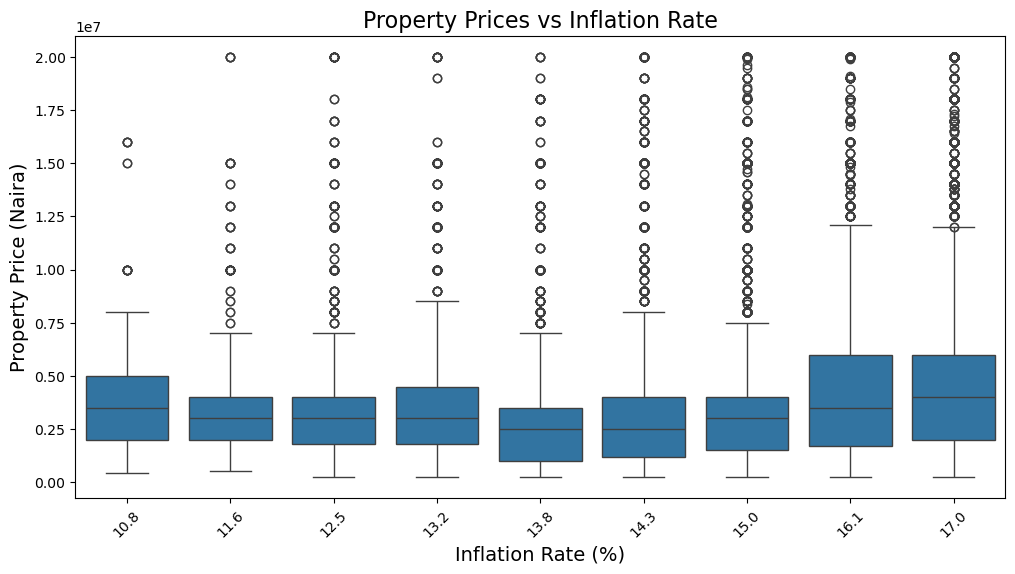

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Creating the boxplot for Price vs Inflation Rate
sns.boxplot(x='inflation_rate', y='PRICE', data=Lagos_RE)

# Adding labels and title
plt.title('Property Prices vs Inflation Rate', fontsize=16)
plt.xlabel('Inflation Rate (%)', fontsize=14)
plt.ylabel('Property Price (Naira)', fontsize=14)
plt.xticks(rotation=45)  

# Show the plot
plt.show()



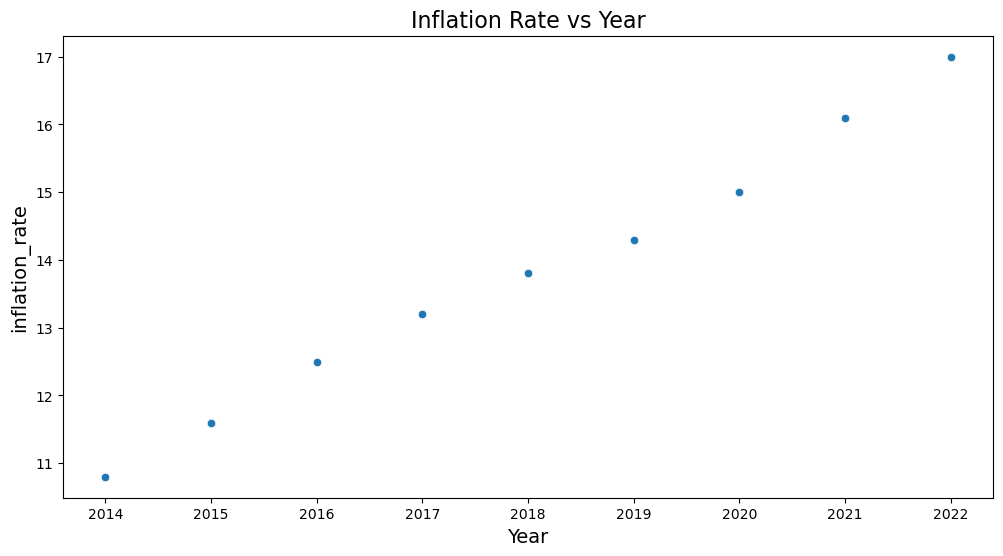

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot for Inflation Rate vs. Year
plt.figure(figsize=(12, 6))

# Scatter plot with exact inflation rates on the x-axis, and years on the y-axis
sns.scatterplot(x='Year', y='inflation_rate', data=Lagos_RE, marker='o')

# Adding labels and title
plt.title('Inflation Rate vs Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('inflation_rate', fontsize=14)

# Show the plot
plt.show()


In [25]:
Lagos_RE.columns

Index(['LOCATION', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'TOILETS', 'HOUSE_TYPE',
       'Year', 'inflation_rate', 'price_range'],
      dtype='object')

In [26]:
from sklearn.model_selection import train_test_split

# Splitting the features into independent (X) and target variable (y)
X = Lagos_RE[['Year', 'BEDROOMS', 'TOILETS', 'HOUSE_TYPE', 'LOCATION']]
y = Lagos_RE['PRICE']

# Performing the 70/30 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the sizes of the splits for confirmation
print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)


Training Set Size: (39055, 5)
Testing Set Size: (16738, 5)


In [27]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the model with L2 regularization using reg_lambda
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, reg_lambda=1)  # Use reg_lambda instead of lambda
xgb_model.fit(X_train, y_train)

# Making predictions
y_pred = xgb_model.predict(X_test)

# Calculation of metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R²: {r2:.3f}, MAE: {mae:.3f}, MSE: {mse:.3f}")

R²: 0.753, MAE: 1190699.803, MSE: 3628078811000.818


In [28]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE: {-cv_scores.mean():.3f}")

Cross-validated MSE: 3706091081465.509


In [29]:
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

grid_search = GridSearchCV(XGBRegressor(objective='reg:squarederror'), param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and score
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [30]:
import xgboost as xgb
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score


# Step 1: Create a new XGBoost model with the best parameters
best_params = {
    'learning_rate': 0.3,
    'max_depth': 7,
    'n_estimators': 200,
    'objective': 'reg:squarederror'  # Ensure to include the objective
}

# Step 2: Initialize and fit the model
xgb_model_best = xgb.XGBRegressor(**best_params)
xgb_model_best.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_best = xgb_model_best.predict(X_test)

# Step 4: Calculate performance metrics
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = root_mean_squared_error(y_test, y_pred_best)

# Step 5: Print the performance metrics
print(f"Best Model Performance:")
print(f"R²: {r2_best:.3f}, MAE: {mae_best:.3f}, MSE: {mse_best:.3f}, RMSE: {rmse_best:.3f}")

Best Model Performance:
R²: 0.755, MAE: 1175948.111, MSE: 3609497799819.430, RMSE: 1899867.837


In [31]:
from sklearn.metrics import root_mean_squared_error

# Step 4: Get the best estimator from grid search (this is your final model)
final_model = grid_search.best_estimator_

# Step 5: Predict on Validation Set
y_test_pred = final_model.predict(X_test)

# Step 6: Calculate RMSE for Validation Set
final_rmse = root_mean_squared_error(y_test, y_test_pred)  # RMSE calculation

# Step 7: Print the RMSE
print(f"Final RMSE on Validation Set: {final_rmse}")

# Get feature importances from the final model
tuned_importances = final_model.feature_importances_

# Create a DataFrame for tuned model visualization
tuned_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': tuned_importances})
tuned_importance_df = tuned_importance_df.sort_values(by='Importance', ascending=False)

# Display tuned model feature importances
print("Tuned Model Feature Importance:")
print(tuned_importance_df)

Final RMSE on Validation Set: 1923475.9982611386
Tuned Model Feature Importance:
      Feature  Importance
4    LOCATION    0.638812
2     TOILETS    0.207401
1    BEDROOMS    0.077294
0        Year    0.051517
3  HOUSE_TYPE    0.024976


In [32]:
import joblib

# Assuming xgb_model is your trained XGBoost model
joblib.dump(xgb_model, 'xgb_model.joblib')

['xgb_model.joblib']

In [33]:
# y_test_pred contains the predicted prices
y_test_pred = final_model.predict(X_test)

# Converting predicted prices to whole numbers
y_test_pred_rounded = y_test_pred.round().astype(int)

# Creating a DataFrame to display actual vs. predicted prices
results_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_test_pred_rounded
})

# Display the results
print(results_df.head(20))

       Actual Price  Predicted Price
3335      5000000.0          5505576
53546     3000000.0          4476532
971       6000000.0         10833881
28824     2200000.0          1856437
48580      500000.0           514588
45721      900000.0          3102745
52888     2500000.0          3367019
35687    18000000.0         10417977
47073      400009.0           590380
40014     5000000.0          5505576
12051      900000.0           633532
7270      5000000.0          5067522
30236     4000000.0          5150463
47876     4000000.0          2043235
42606     2500000.0          3361010
16356     6000000.0          4789065
828      10000000.0         11834250
8537      3500000.0          3606120
5876      3500000.0          4163927
47977     1500000.0          2291775


## PREDICTING PRICES FROM 2025-2030

In [34]:
import pandas as pd
import numpy as np

# Load your actual historical data from a CSV file
historical_data = pd.read_csv('cleaned_data.csv')

# Step 1: Analyze valid combinations
valid_combinations = historical_data.groupby(['BEDROOMS', 'TOILETS']).size().reset_index(name='Count')

# Step 2: Create a DataFrame for future years with more entries
years = np.tile(np.arange(2025, 2031), 100)  # Repeat years for multiple entries
num_entries = len(years)

# Step 3: Sample from valid combinations
# Randomly sample from the valid combinations DataFrame
sampled_combinations = valid_combinations.sample(n=num_entries, replace=True, weights=valid_combinations['Count'])

# Step 4: Create the final DataFrame for future predictions
future_data = pd.DataFrame({
    'Index': range(1, num_entries + 1),  # Adding an index column starting from 1
    'Year': years,
    'BEDROOMS': sampled_combinations['BEDROOMS'].values,
    'TOILETS': sampled_combinations['TOILETS'].values,
    'HOUSE_TYPE': np.random.choice(historical_data['HOUSE_TYPE'].unique(), size=num_entries),
    'LOCATION': np.random.choice(historical_data['LOCATION'].unique(), size=num_entries),
})

future_data.set_index('Index', inplace=True)

future_data.to_csv('future_data.csv', index=False)
future_data = pd.read_csv('future_data.csv')

future_data.head(25)


,Year,BEDROOMS,TOILETS,HOUSE_TYPE,LOCATION
0,2025,4,5,TERRACED DUPLEX,Badagry
1,2026,4,5,BUNGALOW,Agege
2,2027,4,5,HOUSE,Ogba
3,2028,4,5,MASSIONETTE,Sangotedo
4,2029,5,5,detached duplex,Lekki
5,2030,4,4,detached duplex,Ikorodu
6,2025,4,5,apartment,Ajah
7,2026,4,4,detached duplex,Yaba
8,2027,3,4,MASSIONETTE,Amuwo Odofin
9,2028,4,5,DETACHED DUPLEX,Ojota


In [35]:
import pandas as pd

# Loading the new dataframe historical data from a CSV file
historical_data = pd.read_csv('cleaned_data.csv')

# 'PRICE' is the target variable
target_encoding = {}

# Calculate mean price for each house type
target_encoding['HOUSE_TYPE'] = historical_data.groupby('HOUSE_TYPE')['PRICE'].mean().to_dict()

# Calculate mean price for each location
target_encoding['LOCATION'] = historical_data.groupby('LOCATION')['PRICE'].mean().to_dict()

# Applying the target encoding to HOUSE_TYPE and LOCATION columns in future_data
future_data['HOUSE_TYPE'] = future_data['HOUSE_TYPE'].map(target_encoding['HOUSE_TYPE'])
future_data['LOCATION'] = future_data['LOCATION'].map(target_encoding['LOCATION'])

# Display the updated future DataFrame with encoded values
print(future_data)

     Year  BEDROOMS  TOILETS    HOUSE_TYPE      LOCATION
0    2025         4        5  4.765326e+06  5.937500e+05
1    2026         4        5  7.781250e+05  1.264565e+06
2    2027         4        5  4.399871e+06  1.445986e+06
3    2028         4        5  8.489189e+06  1.684906e+06
4    2029         5        5  9.097759e+06  4.370570e+06
..    ...       ...      ...           ...           ...
595  2026         3        4  2.610606e+06  1.264565e+06
596  2027         4        5  2.610606e+06  2.831501e+06
597  2028         3        4  2.610606e+06  3.239421e+06
598  2029         2        3  1.052432e+06  5.866190e+05
599  2030         3        4  1.896728e+06  1.161541e+07

[600 rows x 5 columns]


In [36]:
X_values = future_data[['Year', 'BEDROOMS', 'TOILETS', 'HOUSE_TYPE', 'LOCATION']]

In [37]:
# Making predictions using the trained xgb_model
predicted_prices = xgb_model_best.predict(X_values)
predicted_prices = predicted_prices.round().astype(int)

# Adding the predictions to the DataFrame (future_data)
future_data['Predicted_Price'] = predicted_prices

future_data.to_csv('future_data_encoded.csv', index=False)
future_data = pd.read_csv('future_data_encoded.csv')

future_data.head(25)


,Year,BEDROOMS,TOILETS,HOUSE_TYPE,LOCATION,Predicted_Price
0,2025,4,5,4.765326e+06,5.937500e+05,2631478
1,2026,4,5,7.781250e+05,1.264565e+06,1241954
2,2027,4,5,4.399871e+06,1.445986e+06,3263958
3,2028,4,5,8.489189e+06,1.684906e+06,4944474
4,2029,5,5,9.097759e+06,4.370570e+06,7767966
5,2030,4,4,9.097759e+06,5.866190e+05,841821
6,2025,4,5,4.311077e+06,1.876967e+06,3262754
7,2026,4,4,9.097759e+06,1.833920e+06,4126002
8,2027,3,4,8.489189e+06,1.544470e+06,664929
9,2028,4,5,4.160807e+06,1.248387e+06,3718804


In [38]:
import pandas as pd

# Load the original and encoded datasets
original_data = pd.read_csv('future_data.csv')
encoded_data = pd.read_csv('future_data_encoded.csv')

combined_location_data = pd.concat([original_data['LOCATION'], encoded_data['LOCATION']], axis=1)

# Renaming the columns
combined_location_data.columns = ['Original Location', 'Encoded Location']

# Saving it to a csv file
combined_location_data.to_csv('combined_location_data.csv', index=False)
combined_location_data = pd.read_csv('combined_location_data.csv')

combined_location_data.head(25)

,Original Location,Encoded Location
0,Badagry,5.937500e+05
1,Agege,1.264565e+06
2,Ogba,1.445986e+06
3,Sangotedo,1.684906e+06
4,Lekki,4.370570e+06
5,Ikorodu,5.866190e+05
6,Ajah,1.876967e+06
7,Yaba,1.833920e+06
8,Amuwo Odofin,1.544470e+06
9,Ojota,1.248387e+06


In [39]:
import pandas as pd

# Load the original and encoded datasets
original_data = pd.read_csv('future_data.csv')
encoded_data = pd.read_csv('future_data_encoded.csv')

combined_housetype_data = pd.concat([original_data['HOUSE_TYPE'], encoded_data['HOUSE_TYPE']], axis=1)

# Renaming the columns
combined_housetype_data.columns = ['Original HOUSE_TYPE', 'Encoded HOUSE_TYPE']

# Saving it to a csv file
combined_housetype_data.to_csv('combined_housetype_data.csv', index=False)
combined_housetype_data = pd.read_csv('combined_housetype_data.csv')

combined_housetype_data.head(15)

,Original HOUSE_TYPE,Encoded HOUSE_TYPE
0,TERRACED DUPLEX,4.765326e+06
1,BUNGALOW,7.781250e+05
2,HOUSE,4.399871e+06
3,MASSIONETTE,8.489189e+06
4,detached duplex,9.097759e+06
5,detached duplex,9.097759e+06
6,apartment,4.311077e+06
7,detached duplex,9.097759e+06
8,MASSIONETTE,8.489189e+06
9,DETACHED DUPLEX,4.160807e+06
